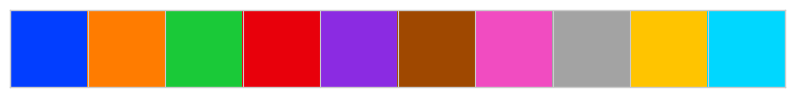

In [1]:
## BIBLIOTECAS

# Manipulação e Tratamento de dados ############################
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

import pyperclip
from tableone import TableOne

# Repositorio - Diretorio ############################
import shutil
import os

# Manipulação de Strings ############################
import re #regex
import unidecode #arrumar textos

#tempo
import time
from time import sleep

#ignorando Warning inuteis ############################
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Graficos ############################
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-whitegrid')

import seaborn as sns
custom_palette = sns.color_palette("bright")
sns.palplot(custom_palette)
sns.set_palette("bright")

# Definindo o estilo de fonte e tema
import matplotlib.font_manager as fm #para alterar as fontes dos graficos
fonte = fm.FontProperties(family="Calibri", style="italic")
%matplotlib inline

# TESTE ESTATISTICOS ############################ ANOVA
import statistics
import math

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson #teste de autocorrelação

In [2]:
pasta = 'C:/Users/gabri/OneDrive/Documentos/Anestesia - CMA/Cultura de Segurança/2 - Tabelas com Escores Anuais' 
pasta = pasta + '/'

In [3]:
inicio = time.time() #iniciando o cronometro

df = pd.read_excel(pasta + "0 - Dados_Limpos.xlsx")
df_bruto = df.copy()
df.sample(5)

fim = time.time() #encerrando cronometro
print('Tempo', round(fim - inicio, 3))

Tempo 273.564


In [4]:
for coluna in df.columns:
    print(coluna, '='*25)
    counts = df[coluna].value_counts()
    percentages = df[coluna].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

    # Usando o método 'agg' para juntar contagens e porcentagens em uma mesma DataFrame
    res = pd.DataFrame({'counts': counts, 'percentage': percentages})
    print(res)
    print('\n')

Ano =========================
      counts percentage
Ano                    
2022   48176      18.6%
2021   43317      16.7%
2020   36945      14.2%
2019   32631      12.6%
2018   27828      10.7%
2017   26698      10.3%
2016   23506       9.1%
2015   13318       5.1%
2014    6849       2.6%


Unidade =========================
               counts percentage
Unidade                         
Itaim           13456       5.2%
Copa D'Or       10705       4.1%
Quinta D'Or     10309       4.0%
Brasil           9982       3.9%
Anália Franco    9756       3.8%
...               ...        ...
Yutaka            296       0.1%
Santa Emília      200       0.1%
HNSN Epitácio     198       0.1%
Santa Marina      122       0.0%
Orthoservice       87       0.0%

[71 rows x 2 columns]


Qual é sua principal área ou unidade neste hospital? =========================
                                                    counts percentage
Qual é sua principal área ou unidade neste hosp...                 

# Colunas

In [5]:
lista_scores = ['1. As pessoas se apoiam umas às outras nesta unidade',
                '2. Temos pessoas suficientes para lidar com o volume de trabalho',
                '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
                '4. Nesta unidade, as pessoas se tratam com respeito',
                '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
                '6. Estamos ativamente buscando melhorias para a segurança do paciente',
                '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
                '8. Os funcionários sentem que seus erros são usados contra eles',
                '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
                '10. É apenas por acaso que erros mais sérios não acontecem por aqui',
                '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam',
                '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
                '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade',
                '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais',
                '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
                '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional',
                '17. Temos problemas com a segurança do paciente nesta unidade',
                '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam',
                '19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
                '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
                '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
                '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente',
                '23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
                '24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
                '25. Somos informados sobre os erros que acontecem nesta unidade',
                '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
                '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer',
                '28. Os funcionários têm receio de perguntar quando algo não parece certo',
                '29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
                '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
                '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?',
                '32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
                '33. As unidades hospitalares não se coordenam bem entre si.',
                '34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
                '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
                '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
                '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
                '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
                '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
                '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso',
                '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes',
                '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']

In [6]:
colunas_adicionais = ['SEÇÃO G2: Notificou algum evento nos ultimos 12 meses',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_0. Nenhuma notificações de eventos',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_1. 1 a 2 notificações de eventos',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_2. 3 a 5 notificações de eventos',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_3. 6 a 10 notificações de eventos',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_4. 11 a 20 notificações de eventos',
                    'SEÇÃO G: Número de Eventos Notificados  Nos últimos 12 meses, quantas notificações de evento você preencheu e enviou?_5. 21 notificações de eventos ou mais',
                    'SEÇÃO H: 3.2 Trabalha mais que 40horas semanais',
                    'SEÇÃO H: 3.2 Trabalha mais que 60horas semanais',
                    'SEÇÃO H: 3.2 Trabalha mais que 80horas semanais',
                    'Por favor, dê uma nota geral para a segurança do paciente em sua área/unidade de trabalho hospitalar._Excelente',
                    'Por favor, dê uma nota geral para a segurança do paciente em sua área/unidade de trabalho hospitalar._Muito boa',
                    'Por favor, dê uma nota geral para a segurança do paciente em sua área/unidade de trabalho hospitalar._Muito ruim',
                    'Por favor, dê uma nota geral para a segurança do paciente em sua área/unidade de trabalho hospitalar._Ruim',
                    'Por favor, dê uma nota geral para a segurança do paciente em sua área/unidade de trabalho hospitalar._Satisfatória',
                    'Nota Geral == Satisfatoria ?', 'Nota Geral == Boa ?',
                    'SEÇÃO H: 1.2 trabalha a mais de 1 ano no hospital?',
                    'SEÇÃO H: 1.3 trabalha a mais de 5 anos no hospital?',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_0. Menos de 1 ano',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_1. 1 a 5 anos',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_2. 6 a 10 anos',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_3. 11 a 15 anos',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_4. 16 a 20 anos',
                    'SEÇÃO H: 1. Há quanto tempo você trabalha neste hospital?_5. 21 anos ou mais',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_0. Menos de 1 ano',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_1. 1 a 5 anos',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_2. 6 a 10 anos',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_3. 11 a 15 anos',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_4. 16 a 20 anos',
                    '6. Há quanto tempo você trabalha em sua profissão ou especialização atual?_5. 21 anos ou mais']
lista_scores.extend(colunas_adicionais)
#print(lista_scores)

# 1 - Score por Ano x Acreditação

Criando scores por ano diferenciando por acreditação
> 2 escores por ano

In [7]:
df = df_bruto.copy()

In [8]:
inicio = time.time() #iniciando o cronometro

resultado = pd.DataFrame()

for Ano in sorted(df['Ano'].unique()):

    ###################################################
    for acreditacao in range(2):
        dff = df[(df['Ano'] == Ano) & (df['acreditacao'] == acreditacao)].copy().reset_index(drop=True)
        fd = pd.DataFrame({'Ano': dff['Ano'].unique()})
        fd['acreditacao'] = acreditacao
        fd['quant'] = len(dff)
        fd['quant_unidade'] = len(dff['Unidade'].unique())

        for coluna in lista_scores:
            fd[coluna] = np.nan
            for i in range(len(fd)):
                if len(dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)) > 1:
                    fd[coluna][i] = dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)[1]*100
                else:
                    fd[coluna][i] = 0

        fd = fd.sort_values(by = 'Ano', ascending = True).reset_index(drop=True)
        resultado = pd.concat([resultado, fd]).reset_index(drop=True)

fim = time.time() #encerrando cronometro
print('Tempo para rodar a simulação:', round(fim - inicio, 3))

print('quantidade de linhas sumarizadas:', sum(resultado['quant']))

Tempo para rodar a simulação: 2.86
quantidade de linhas sumarizadas: 259268


In [9]:
df = resultado.copy()

df['Abertura de comunicação'] = 0
lista = ['24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
         '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
         '28. Os funcionários têm receio de perguntar quando algo não parece certo']
for i in lista:
    df['Abertura de comunicação'] = df['Abertura de comunicação'] + df[i]
df['Abertura de comunicação'] = df['Abertura de comunicação']/len(lista)

df['Feedback e comunicação sobre erros'] = 0
lista = ['23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
         '25. Somos informados sobre os erros que acontecem nesta unidade',
         '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer']
for i in lista:
    df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros'] + df[i]
df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros']/len(lista)

df['Frequência de eventos relatados'] = 0
lista = ['29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
         '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
         '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?']
for i in lista:
    df['Frequência de eventos relatados'] = df['Frequência de eventos relatados'] + df[i]
df['Frequência de eventos relatados'] = df['Frequência de eventos relatados']/len(lista)

df['Apoio de gestão hospitalar para segurança do paciente'] = 0
lista = ['32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
         '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
         '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso']
for i in lista:
    df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente'] + df[i]
df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente']/len(lista)

df['Trabalho em equipe entre as unidades hospitalares'] = 0
lista = ['33. As unidades hospitalares não se coordenam bem entre si.',
         '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
         '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
         '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes']
for i in lista:
    df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares'] + df[i]
df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares']/len(lista)

df['Trabalho em equipe no âmbito das unidades'] = 0
lista = ['1. As pessoas se apoiam umas às outras nesta unidade',
         '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
         '4. Nesta unidade, as pessoas se tratam com respeito',
         '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam']
for i in lista:
    df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades'] + df[i]
df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades']/len(lista)

df['Transferências internas e passagens de plantão'] = 0
lista = ['34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
         '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
         '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
         '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']
for i in lista:
    df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão'] + df[i]
df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão']/len(lista)

df['Aprendizado organizacional - melhoria contínua'] = 0
lista = ['6. Estamos ativamente buscando melhorias para a segurança do paciente',
         '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
         '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade']
for i in lista:
    df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua'] + df[i]
df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua']/len(lista)

df['Expectativas de promoção da segurança dos supervisores e gerentes'] = 0
lista = ['19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
         '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
         '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
         '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente']
for i in lista:
    df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes'] + df[i]
df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes']/len(lista)

df['Percepção gerais sobre segurança'] = 0
lista = ['10. É apenas por acaso que erros mais sérios não acontecem por aqui',
         '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
         '17. Temos problemas com a segurança do paciente nesta unidade',
         '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam']
for i in lista:
    df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança'] + df[i]
df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança']/len(lista)

df['Respostas não punitivas aos erros'] = 0
lista = ['8. Os funcionários sentem que seus erros são usados contra eles',
         '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
         '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional']
for i in lista:
    df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros'] + df[i]
df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros']/len(lista)

df['Staffing'] = 0
lista = ['2. Temos pessoas suficientes para lidar com o volume de trabalho',
         '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
         '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
         '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais']
for i in lista:
    df['Staffing'] = df['Staffing'] + df[i]
df['Staffing'] = df['Staffing']/len(lista)

In [10]:
display(pd.concat([df.head(5),df.tail(5)]))
df.to_excel(pasta + '1 - Dados_Score_Ano_Acreditacao.xlsx')

,Ano,acreditacao,quant,quant_unidade,1. As pessoas se apoiam umas às outras nesta unidade,2. Temos pessoas suficientes para lidar com o volume de trabalho,"3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa","4. Nesta unidade, as pessoas se tratam com respeito",5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes,6. Estamos ativamente buscando melhorias para a segurança do paciente,...,Frequência de eventos relatados,Apoio de gestão hospitalar para segurança do paciente,Trabalho em equipe entre as unidades hospitalares,Trabalho em equipe no âmbito das unidades,Transferências internas e passagens de plantão,Aprendizado organizacional - melhoria contínua,Expectativas de promoção da segurança dos supervisores e gerentes,Percepção gerais sobre segurança,Respostas não punitivas aos erros,Staffing
0,2014,0,366,2,64.088398,34.444444,78.787879,82.960894,44.972067,80.769231,...,64.401727,62.899690,48.931344,67.841974,45.662204,72.525345,66.335835,52.832017,36.685189,45.970429
1,2014,1,6483,10,59.896406,27.621723,72.874747,75.331565,51.119812,81.624667,...,54.090129,61.514487,47.614657,62.432830,40.388309,69.637063,63.841662,52.092022,38.008854,43.997124
2,2015,0,756,3,66.351351,52.069426,85.885486,83.266399,65.369128,89.558233,...,62.991608,75.478086,61.605665,72.656133,53.764626,77.545146,71.924208,61.793261,41.228767,61.586276
3,2015,1,12562,21,62.507063,33.069659,75.924583,77.408691,51.437596,85.657661,...,58.433697,68.284922,53.719786,65.714363,45.658074,74.854024,67.591973,56.942783,40.051830,47.080484
4,2016,0,1377,3,66.372981,43.452816,85.212299,82.564103,60.528247,92.668622,...,61.449900,80.503428,65.305091,72.830903,57.459563,82.534409,75.599338,64.882052,39.665973,56.153138
13,2020,1,32326,37,72.480065,42.244974,81.784236,84.659445,57.174476,91.495062,...,63.295366,79.906280,64.584397,74.030362,55.975270,82.030142,73.957028,65.834077,42.797665,54.087901
14,2021,0,5500,12,69.965246,40.680446,79.503559,82.165024,53.944719,89.899543,...,55.892247,75.550944,61.555121,71.333027,51.294565,79.494545,73.305371,60.221772,40.589031,50.555516
15,2021,1,37817,44,72.545677,43.708592,80.650138,83.855691,54.910476,91.791581,...,61.553871,79.420345,64.287690,73.147398,56.205386,82.365056,74.251353,65.524065,42.977649,52.441010
16,2022,0,5105,13,72.344214,37.665416,79.814705,83.431953,54.626159,90.966469,...,58.124896,76.775150,63.966146,72.531387,54.949920,81.040207,74.490189,61.724931,43.211575,51.867411
17,2022,1,43071,55,73.467623,40.856949,80.068648,84.250607,54.204668,91.415156,...,61.159038,78.015634,63.911760,73.249723,55.926771,82.159909,74.079350,64.768642,43.073661,52.392480


# 2 - Score Por Ano x Acreditação x Unidade

Criando scores de cada unidade por ano
> Diversas escores por ano (cada 1 para cada unidade)

In [11]:
df = df_bruto.copy()

In [12]:
inicio = time.time() #iniciando o cronometro

resultado = pd.DataFrame()

for Ano in sorted(df['Ano'].unique()):

    ###################################################
    for acreditacao in range(2):
        dff = df[(df['Ano'] == Ano) & (df['acreditacao'] == acreditacao)].copy().reset_index(drop=True)
        fd = pd.DataFrame({'Unidade': dff['Unidade'].unique()})
        fd['acreditacao'] = acreditacao
        
        fd['Acreditação'] = np.nan
        fd['Acreditação2'] = np.nan
        
        fd['Ano'] = Ano
        fd['Regional'] = np.nan
        fd['Estado'] = np.nan
        fd['quant'] = np.nan

        for coluna in lista_scores:
            fd[coluna] = np.nan
            for i in range(len(fd)):
                if len(dff[coluna][dff['Unidade'] == fd['Unidade'][i]].value_counts(normalize=True)) > 1:
                    fd[coluna][i] = dff[coluna][dff['Unidade'] == fd['Unidade'][i]].value_counts(normalize=True)[1]*100
                else:
                    fd[coluna][i] = 0
                fd['Regional'][i] = dff['Regional'][dff['Unidade'] == fd['Unidade'][i]].values[0]
                fd['Estado'][i] = dff['Estado'][dff['Unidade'] == fd['Unidade'][i]].values[0]
                fd['quant'][i] = len(dff[dff['Unidade'] == fd['Unidade'][i]])
                
                fd['Acreditação'][i] = dff['Acreditação'][(dff['Unidade'] == fd['Unidade'][i]) &
                                                          (dff['Ano'] == fd['Ano'][i])].values[0]
                fd['Acreditação2'][i] = dff['Acreditação2'][(dff['Unidade'] == fd['Unidade'][i]) &
                                                            (dff['Ano'] == fd['Ano'][i])].values[0]
                
        resultado = pd.concat([resultado, fd]).reset_index(drop=True)

fim = time.time() #encerrando cronometro
print('Tempo para rodar a simulação:', round(fim - inicio, 3))

print('quantidade de linhas sumarizadas:', sum(resultado['quant']))
df = resultado.sort_values(by = ['Unidade','Ano'], ascending = True).reset_index(drop=True)

Tempo para rodar a simulação: 305.796
quantidade de linhas sumarizadas: 259268.0


In [13]:
df['Abertura de comunicação'] = 0
lista = ['24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
         '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
         '28. Os funcionários têm receio de perguntar quando algo não parece certo']
for i in lista:
    df['Abertura de comunicação'] = df['Abertura de comunicação'] + df[i]
df['Abertura de comunicação'] = df['Abertura de comunicação']/len(lista)

df['Feedback e comunicação sobre erros'] = 0
lista = ['23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
         '25. Somos informados sobre os erros que acontecem nesta unidade',
         '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer']
for i in lista:
    df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros'] + df[i]
df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros']/len(lista)

df['Frequência de eventos relatados'] = 0
lista = ['29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
         '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
         '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?']
for i in lista:
    df['Frequência de eventos relatados'] = df['Frequência de eventos relatados'] + df[i]
df['Frequência de eventos relatados'] = df['Frequência de eventos relatados']/len(lista)

df['Apoio de gestão hospitalar para segurança do paciente'] = 0
lista = ['32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
         '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
         '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso']
for i in lista:
    df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente'] + df[i]
df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente']/len(lista)

df['Trabalho em equipe entre as unidades hospitalares'] = 0
lista = ['33. As unidades hospitalares não se coordenam bem entre si.',
         '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
         '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
         '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes']
for i in lista:
    df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares'] + df[i]
df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares']/len(lista)

df['Trabalho em equipe no âmbito das unidades'] = 0
lista = ['1. As pessoas se apoiam umas às outras nesta unidade',
         '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
         '4. Nesta unidade, as pessoas se tratam com respeito',
         '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam']
for i in lista:
    df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades'] + df[i]
df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades']/len(lista)

df['Transferências internas e passagens de plantão'] = 0
lista = ['34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
         '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
         '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
         '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']
for i in lista:
    df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão'] + df[i]
df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão']/len(lista)

df['Aprendizado organizacional - melhoria contínua'] = 0
lista = ['6. Estamos ativamente buscando melhorias para a segurança do paciente',
         '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
         '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade']
for i in lista:
    df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua'] + df[i]
df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua']/len(lista)

df['Expectativas de promoção da segurança dos supervisores e gerentes'] = 0
lista = ['19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
         '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
         '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
         '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente']
for i in lista:
    df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes'] + df[i]
df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes']/len(lista)

df['Percepção gerais sobre segurança'] = 0
lista = ['10. É apenas por acaso que erros mais sérios não acontecem por aqui',
         '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
         '17. Temos problemas com a segurança do paciente nesta unidade',
         '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam']
for i in lista:
    df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança'] + df[i]
df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança']/len(lista)

df['Respostas não punitivas aos erros'] = 0
lista = ['8. Os funcionários sentem que seus erros são usados contra eles',
         '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
         '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional']
for i in lista:
    df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros'] + df[i]
df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros']/len(lista)

df['Staffing'] = 0
lista = ['2. Temos pessoas suficientes para lidar com o volume de trabalho',
         '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
         '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
         '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais']
for i in lista:
    df['Staffing'] = df['Staffing'] + df[i]
df['Staffing'] = df['Staffing']/len(lista)

In [14]:
# Marcando as unidades que eram não acreditadas e passaram a ser algum momento
df['passou_a_ser_acreditado'] = 0
tabela = pd.DataFrame(columns = df.columns)
count = 0
for unidade in sorted(df['Unidade'].unique()):
    if len(df['acreditacao'][df['Unidade'] == unidade].unique()) >= 2:
        df['passou_a_ser_acreditado'][df['Unidade'] == unidade] = 1
        print(unidade, '='*25)
        print(df[df['Unidade'] == unidade].groupby(['Ano', 'acreditacao']).size(), '\n')
        count += 1
        
        tabela = pd.concat([tabela, df[df['Unidade'] == unidade]])
        
print('='*25, 'QUANTIDADE:', count, '='*25)

display(df['passou_a_ser_acreditado'].value_counts())

Bangu =========================
Ano   acreditacao
2016  0              1
2017  0              1
2018  0              1
2019  0              1
2020  0              1
2021  1              1
2022  1              1
dtype: int64 

Bartira =========================
Ano   acreditacao
2015  0              1
2016  0              1
2017  1              1
2018  1              1
2019  1              1
2020  1              1
2021  1              1
2022  1              1
dtype: int64 

Copa Star =========================
Ano   acreditacao
2017  0              1
2018  0              1
2019  0              1
2020  1              1
2021  1              1
2022  1              1
dtype: int64 

Coração do Brasil =========================
Ano   acreditacao
2014  0              1
2015  1              1
2016  1              1
2017  1              1
2018  1              1
2019  1              1
2020  1              1
2021  1              1
2022  1              1
dtype: int64 

Criança SP =====================

passou_a_ser_acreditado
0    277
1     68
Name: count, dtype: int64

In [15]:
for i in df['passou_a_ser_acreditado'].unique():
    print(i,'='*50)
    count = 0
    for t in df['Unidade'][df['passou_a_ser_acreditado'] == i].unique():
        print(df['acreditacao'][df['Unidade'] == t].unique())
        count += 1
    print(count)

df['passou_a_ser_acreditado'].value_counts()

0 ==================================================
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
58
1 ==================================================
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
13


passou_a_ser_acreditado
0    277
1     68
Name: count, dtype: int64

In [16]:
df['status_eterno'] = np.nan

df['status_eterno'][df['passou_a_ser_acreditado'] == 0] = df['acreditacao']
df['status_eterno'].value_counts()

status_eterno
1.0    243
0.0     34
Name: count, dtype: int64

In [17]:
display(pd.concat([df.head(5),df.tail(5)]))
df.to_excel(pasta + '2 - Dados_Score_Ano_Acreditacao_Unidade.xlsx')

,Unidade,acreditacao,Acreditação,Acreditação2,Ano,Regional,Estado,quant,1. As pessoas se apoiam umas às outras nesta unidade,2. Temos pessoas suficientes para lidar com o volume de trabalho,...,Trabalho em equipe entre as unidades hospitalares,Trabalho em equipe no âmbito das unidades,Transferências internas e passagens de plantão,Aprendizado organizacional - melhoria contínua,Expectativas de promoção da segurança dos supervisores e gerentes,Percepção gerais sobre segurança,Respostas não punitivas aos erros,Staffing,passou_a_ser_acreditado,status_eterno
0,5 de outubro,1,ONA,ONA 2,2022,N,PA,311.0,74.757282,39.285714,...,65.235337,78.558495,54.567658,84.395514,79.463485,54.983432,45.862890,50.733033,0,1.0
1,Aeroporto,0,0.0,0.0,2022,NE,BA,525.0,67.123288,34.169884,...,63.705400,67.253311,57.644177,81.140402,71.754445,57.893346,38.125857,49.909629,0,0.0
2,Aliança,1,Qmentum,Qmentum,2021,NE,BA,1082.0,84.235075,55.844156,...,75.040345,82.245970,70.848337,89.222243,81.377292,72.762106,51.200263,60.606978,0,1.0
3,Aliança,1,Qmentum,Qmentum,2022,NE,BA,1029.0,83.544304,44.455253,...,70.155982,80.032914,67.845966,87.264457,79.034422,69.017709,52.215075,54.638196,0,1.0
4,Alpha Med,0,0.0,0.0,2017,SE,SP,244.0,68.879668,57.024793,...,65.385481,74.889841,49.424389,81.369523,78.799535,54.987140,43.080669,64.222550,0,0.0
340,Vivalle,1,JCI,JCI,2022,SE,SP,918.0,72.568306,31.366120,...,62.819336,69.828804,52.661910,84.508351,71.074336,68.029499,44.492110,45.256607,0,1.0
341,Yutaka,1,ONA,ONA 3,2022,N,PA,296.0,71.575342,44.329897,...,74.999461,77.793220,61.354079,85.211617,78.056923,60.439677,44.572586,56.233438,0,1.0
342,viValle,1,Qmentum,Qmentum,2015,SE,SP,382.0,63.227513,37.037037,...,55.104538,64.823995,48.470697,79.149509,62.292354,62.069157,40.563529,45.572768,0,1.0
343,viValle,1,Qmentum,Qmentum,2016,SE,SP,420.0,72.182254,28.400955,...,62.381536,69.974069,51.893966,79.898077,67.046123,65.749516,40.898472,43.027067,0,1.0
344,viValle,1,Qmentum,Qmentum,2017,SE,SP,593.0,66.893039,30.000000,...,61.807940,67.682775,49.673077,78.736561,66.940609,61.683048,37.430795,43.000943,0,1.0


# 3 - Score por Ano x (Velhos vs Novos)

In [18]:
df = df_bruto.copy()
inicio = time.time() #iniciando o cronometro

resultado = pd.DataFrame()

nome_grande = 'SEÇÃO H: 1.2 trabalha a mais de 1 ano no hospital?'

for Ano in sorted(df['Ano'].unique()):

    ###################################################
    for tempo_trabalho in range(2):
        dff = df[(df['Ano'] == Ano) & (df[nome_grande] == tempo_trabalho)].copy().reset_index(drop=True)
        fd = pd.DataFrame({'Ano': dff['Ano'].unique()})
        fd['trab_1y'] = tempo_trabalho
        fd['quant'] = len(dff)
        fd['quant_unidade'] = len(dff['Unidade'].unique())

        for coluna in lista_scores:
            fd[coluna] = np.nan
            for i in range(len(fd)):
                if len(dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)) > 1:
                    fd[coluna][i] = dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)[1]*100
                else:
                    fd[coluna][i] = 0

        fd = fd.sort_values(by = 'Ano', ascending = True).reset_index(drop=True)
        resultado = pd.concat([resultado, fd]).reset_index(drop=True)

fim = time.time() #encerrando cronometro
print('Tempo:', round(fim - inicio, 3))

print('quantidade de linhas sumarizadas:', sum(resultado['quant']))

Tempo: 3.293
quantidade de linhas sumarizadas: 257030


In [19]:
df = resultado.copy()

df['Abertura de comunicação'] = 0
lista = ['24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
         '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
         '28. Os funcionários têm receio de perguntar quando algo não parece certo']
for i in lista:
    df['Abertura de comunicação'] = df['Abertura de comunicação'] + df[i]
df['Abertura de comunicação'] = df['Abertura de comunicação']/len(lista)

df['Feedback e comunicação sobre erros'] = 0
lista = ['23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
         '25. Somos informados sobre os erros que acontecem nesta unidade',
         '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer']
for i in lista:
    df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros'] + df[i]
df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros']/len(lista)

df['Frequência de eventos relatados'] = 0
lista = ['29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
         '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
         '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?']
for i in lista:
    df['Frequência de eventos relatados'] = df['Frequência de eventos relatados'] + df[i]
df['Frequência de eventos relatados'] = df['Frequência de eventos relatados']/len(lista)

df['Apoio de gestão hospitalar para segurança do paciente'] = 0
lista = ['32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
         '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
         '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso']
for i in lista:
    df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente'] + df[i]
df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente']/len(lista)

df['Trabalho em equipe entre as unidades hospitalares'] = 0
lista = ['33. As unidades hospitalares não se coordenam bem entre si.',
         '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
         '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
         '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes']
for i in lista:
    df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares'] + df[i]
df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares']/len(lista)

df['Trabalho em equipe no âmbito das unidades'] = 0
lista = ['1. As pessoas se apoiam umas às outras nesta unidade',
         '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
         '4. Nesta unidade, as pessoas se tratam com respeito',
         '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam']
for i in lista:
    df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades'] + df[i]
df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades']/len(lista)

df['Transferências internas e passagens de plantão'] = 0
lista = ['34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
         '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
         '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
         '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']
for i in lista:
    df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão'] + df[i]
df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão']/len(lista)

df['Aprendizado organizacional - melhoria contínua'] = 0
lista = ['6. Estamos ativamente buscando melhorias para a segurança do paciente',
         '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
         '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade']
for i in lista:
    df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua'] + df[i]
df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua']/len(lista)

df['Expectativas de promoção da segurança dos supervisores e gerentes'] = 0
lista = ['19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
         '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
         '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
         '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente']
for i in lista:
    df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes'] + df[i]
df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes']/len(lista)

df['Percepção gerais sobre segurança'] = 0
lista = ['10. É apenas por acaso que erros mais sérios não acontecem por aqui',
         '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
         '17. Temos problemas com a segurança do paciente nesta unidade',
         '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam']
for i in lista:
    df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança'] + df[i]
df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança']/len(lista)

df['Respostas não punitivas aos erros'] = 0
lista = ['8. Os funcionários sentem que seus erros são usados contra eles',
         '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
         '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional']
for i in lista:
    df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros'] + df[i]
df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros']/len(lista)

df['Staffing'] = 0
lista = ['2. Temos pessoas suficientes para lidar com o volume de trabalho',
         '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
         '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
         '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais']
for i in lista:
    df['Staffing'] = df['Staffing'] + df[i]
df['Staffing'] = df['Staffing']/len(lista)

In [20]:
display(pd.concat([df.head(5),df.tail(5)]))
df.to_excel(pasta + '3 - Dados_Score_Ano_Trab1y.xlsx')

,Ano,trab_1y,quant,quant_unidade,1. As pessoas se apoiam umas às outras nesta unidade,2. Temos pessoas suficientes para lidar com o volume de trabalho,"3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa","4. Nesta unidade, as pessoas se tratam com respeito",5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes,6. Estamos ativamente buscando melhorias para a segurança do paciente,...,Frequência de eventos relatados,Apoio de gestão hospitalar para segurança do paciente,Trabalho em equipe entre as unidades hospitalares,Trabalho em equipe no âmbito das unidades,Transferências internas e passagens de plantão,Aprendizado organizacional - melhoria contínua,Expectativas de promoção da segurança dos supervisores e gerentes,Percepção gerais sobre segurança,Respostas não punitivas aos erros,Staffing
0,2014,0,1759,12,65.302594,33.065442,76.804124,79.725086,52.216465,85.919540,...,59.471145,68.885501,54.743940,67.791477,46.945118,73.570514,70.164571,56.822582,37.738676,46.661526
1,2014,1,4997,12,58.423085,26.328551,72.057339,74.499494,50.304260,80.178354,...,52.928175,59.118385,45.207939,61.020719,38.424678,68.564391,61.846276,50.457111,38.014122,43.235298
2,2015,0,3139,24,65.098292,40.561471,80.791506,82.432432,55.379645,89.741935,...,62.401081,74.722384,62.307342,70.749389,54.269447,79.905572,72.926856,62.011302,40.893985,50.866071
3,2015,1,10036,24,62.050868,32.174176,75.198792,76.314729,51.214083,84.721099,...,57.507392,66.808487,51.632736,64.696862,43.637098,73.551973,66.312460,55.714126,39.883773,47.006122
4,2016,0,4812,29,67.749371,51.652720,84.390040,85.260297,58.103847,91.105517,...,63.972115,79.749496,67.118078,74.228129,57.596022,81.900931,75.548520,64.917272,40.165892,56.157779
13,2020,1,30487,47,71.723729,42.299714,81.401475,84.124893,57.810542,91.138656,...,62.999206,79.240610,63.870689,73.475777,55.559171,81.712094,73.355118,65.516554,43.178037,54.702011
14,2021,0,10557,56,75.378175,49.767132,83.510537,86.264832,54.472706,93.137534,...,61.225528,81.580489,68.730116,76.459143,59.501488,84.178481,78.044537,65.847929,40.638529,52.723290
15,2021,1,32486,56,71.199283,41.284064,79.530502,82.817424,54.933977,91.060831,...,60.719692,78.089902,62.400194,71.777228,54.324232,81.312801,72.867441,64.535230,43.352539,52.067473
16,2022,0,9072,68,76.333592,45.373961,82.295009,86.840066,53.321504,92.395395,...,60.705195,79.941815,68.395168,76.655714,58.952332,83.113316,77.945502,64.970505,41.645350,51.923320
17,2022,1,38748,68,72.713383,39.409237,79.539986,83.583133,54.496943,91.143730,...,60.886338,77.428769,62.877575,72.396391,55.104580,81.823334,73.268322,64.378119,43.463761,52.466095


# 4 - Score por Ano x Acreditação vs (Velhos vs Novos)

In [21]:
df = df_bruto.copy()
inicio = time.time() #iniciando o cronometro

resultado = pd.DataFrame()

nome_grande = 'SEÇÃO H: 1.2 trabalha a mais de 1 ano no hospital?'

for Ano in sorted(df['Ano'].unique()):
    ###################################################
    for tempo_trabalho in range(2):
        for acreditacao in range(2):
            dff = df[(df['Ano'] == Ano) & (df['acreditacao'] == acreditacao) & (df[nome_grande] == tempo_trabalho)].copy().reset_index(drop=True)
            fd = pd.DataFrame({'Ano': dff['Ano'].unique()})
            fd['acreditacao'] = acreditacao
            fd['quant'] = len(dff)
            fd['quant_unidade'] = len(dff['Unidade'].unique())
            fd['trab_1y'] = tempo_trabalho

            for coluna in lista_scores:
                fd[coluna] = np.nan
                for i in range(len(fd)):
                    if len(dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)) > 1:
                        fd[coluna][i] = dff[coluna][dff['Ano'] == fd['Ano'][i]].value_counts(normalize=True)[1]*100
                    else:
                        fd[coluna][i] = 0

            fd = fd.sort_values(by = 'Ano', ascending = True).reset_index(drop=True)
            resultado = pd.concat([resultado, fd]).reset_index(drop=True)

fim = time.time() #encerrando cronometro
print('Tempo para rodar a simulação:', round(fim - inicio, 3))

print('quantidade de linhas sumarizadas:', sum(resultado['quant']))

Tempo para rodar a simulação: 4.963
quantidade de linhas sumarizadas: 257030


In [22]:
df = resultado.copy()

df['Abertura de comunicação'] = 0
lista = ['24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
         '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
         '28. Os funcionários têm receio de perguntar quando algo não parece certo']
for i in lista:
    df['Abertura de comunicação'] = df['Abertura de comunicação'] + df[i]
df['Abertura de comunicação'] = df['Abertura de comunicação']/len(lista)

df['Feedback e comunicação sobre erros'] = 0
lista = ['23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
         '25. Somos informados sobre os erros que acontecem nesta unidade',
         '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer']
for i in lista:
    df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros'] + df[i]
df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros']/len(lista)

df['Frequência de eventos relatados'] = 0
lista = ['29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
         '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
         '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?']
for i in lista:
    df['Frequência de eventos relatados'] = df['Frequência de eventos relatados'] + df[i]
df['Frequência de eventos relatados'] = df['Frequência de eventos relatados']/len(lista)

df['Apoio de gestão hospitalar para segurança do paciente'] = 0
lista = ['32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
         '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
         '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso']
for i in lista:
    df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente'] + df[i]
df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente']/len(lista)

df['Trabalho em equipe entre as unidades hospitalares'] = 0
lista = ['33. As unidades hospitalares não se coordenam bem entre si.',
         '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
         '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
         '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes']
for i in lista:
    df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares'] + df[i]
df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares']/len(lista)

df['Trabalho em equipe no âmbito das unidades'] = 0
lista = ['1. As pessoas se apoiam umas às outras nesta unidade',
         '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
         '4. Nesta unidade, as pessoas se tratam com respeito',
         '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam']
for i in lista:
    df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades'] + df[i]
df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades']/len(lista)

df['Transferências internas e passagens de plantão'] = 0
lista = ['34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
         '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
         '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
         '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']
for i in lista:
    df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão'] + df[i]
df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão']/len(lista)

df['Aprendizado organizacional - melhoria contínua'] = 0
lista = ['6. Estamos ativamente buscando melhorias para a segurança do paciente',
         '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
         '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade']
for i in lista:
    df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua'] + df[i]
df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua']/len(lista)

df['Expectativas de promoção da segurança dos supervisores e gerentes'] = 0
lista = ['19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
         '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
         '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
         '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente']
for i in lista:
    df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes'] + df[i]
df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes']/len(lista)

df['Percepção gerais sobre segurança'] = 0
lista = ['10. É apenas por acaso que erros mais sérios não acontecem por aqui',
         '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
         '17. Temos problemas com a segurança do paciente nesta unidade',
         '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam']
for i in lista:
    df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança'] + df[i]
df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança']/len(lista)

df['Respostas não punitivas aos erros'] = 0
lista = ['8. Os funcionários sentem que seus erros são usados contra eles',
         '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
         '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional']
for i in lista:
    df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros'] + df[i]
df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros']/len(lista)

df['Staffing'] = 0
lista = ['2. Temos pessoas suficientes para lidar com o volume de trabalho',
         '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
         '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
         '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais']
for i in lista:
    df['Staffing'] = df['Staffing'] + df[i]
df['Staffing'] = df['Staffing']/len(lista)

In [23]:
display(pd.concat([df.head(5),df.tail(5)]))
df.to_excel(pasta + '4 - Dados_Score_Ano_Acreditacao_Trab1y.xlsx')

# 5 - Score Por Ano x Acreditação x Unidade x (Velhos vs Novos)

In [27]:
df = df_bruto.copy()
inicio = time.time() #iniciando o cronometro

resultado = pd.DataFrame()

for Ano in sorted(df['Ano'].unique()):

    ###################################################
    for tempo_trabalho in range(2):
        for acreditacao in range(2):
            dff = df[(df['Ano'] == Ano) & (df['acreditacao'] == acreditacao) & (df[nome_grande] == tempo_trabalho)].copy().reset_index(drop=True)
            fd = pd.DataFrame({'Unidade': dff['Unidade'].unique()})
            fd['acreditacao'] = acreditacao

            fd['Acreditação'] = np.nan
            fd['Acreditação2'] = np.nan

            fd['Ano'] = Ano
            fd['Regional'] = np.nan
            fd['Estado'] = np.nan
            fd['quant'] = np.nan
            fd['trabalha_mais_1ano'] = tempo_trabalho

            for coluna in lista_scores:
                fd[coluna] = np.nan
                for i in range(len(fd)):
                    if len(dff[coluna][dff['Unidade'] == fd['Unidade'][i]].value_counts(normalize=True)) > 1:
                        fd[coluna][i] = dff[coluna][dff['Unidade'] == fd['Unidade'][i]].value_counts(normalize=True)[1]*100
                    else:
                        fd[coluna][i] = 0
                    fd['Regional'][i] = dff['Regional'][dff['Unidade'] == fd['Unidade'][i]].values[0]
                    fd['Estado'][i] = dff['Estado'][dff['Unidade'] == fd['Unidade'][i]].values[0]
                    fd['quant'][i] = len(dff[dff['Unidade'] == fd['Unidade'][i]])

                    fd['Acreditação'][i] = dff['Acreditação'][(dff['Unidade'] == fd['Unidade'][i]) &
                                                              (dff['Ano'] == fd['Ano'][i])].values[0]
                    fd['Acreditação2'][i] = dff['Acreditação2'][(dff['Unidade'] == fd['Unidade'][i]) &
                                                                (dff['Ano'] == fd['Ano'][i])].values[0]

            resultado = pd.concat([resultado, fd]).reset_index(drop=True)

fim = time.time() #encerrando cronometro
print('Tempo para rodar a simulação:', round(fim - inicio, 3))

print('quantidade de linhas sumarizadas:', sum(resultado['quant']))
df = resultado.sort_values(by = ['Unidade','Ano'], ascending = True).reset_index(drop=True)

Tempo para rodar a simulação: 324.026
quantidade de linhas sumarizadas: 257030.0


In [28]:
df['Abertura de comunicação'] = 0
lista = ['24. Os funcionários falam voluntariamente se vêem algo que possa afetar negativamente o atendimento aos pacientes',
         '26. Os funcionários sentem-se à vontade para questionar decisões ou ações dos que têm mais autoridade',
         '28. Os funcionários têm receio de perguntar quando algo não parece certo']
for i in lista:
    df['Abertura de comunicação'] = df['Abertura de comunicação'] + df[i]
df['Abertura de comunicação'] = df['Abertura de comunicação']/len(lista)

df['Feedback e comunicação sobre erros'] = 0
lista = ['23. Recebemos feedback das mudanças implementadas com base nos eventos notificados',
         '25. Somos informados sobre os erros que acontecem nesta unidade',
         '27. Nesta unidade, discutimos maneiras de impedir que os erros tornem a acontecer']
for i in lista:
    df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros'] + df[i]
df['Feedback e comunicação sobre erros'] = df['Feedback e comunicação sobre erros']/len(lista)

df['Frequência de eventos relatados'] = 0
lista = ['29. Quando acontece um erro, mas ele é identificado e corrigido antes de afetar o paciente, com que frequência é notificado?',
         '30. Quando acontece um erro, mas que não tem potencial de dano ao paciente, com que frequência é notificado?',
         '31. Quando acontece um erro que poderia prejudicar o paciente, mas isto não ocorreu, com que frequência é notificado?']
for i in lista:
    df['Frequência de eventos relatados'] = df['Frequência de eventos relatados'] + df[i]
df['Frequência de eventos relatados'] = df['Frequência de eventos relatados']/len(lista)

df['Apoio de gestão hospitalar para segurança do paciente'] = 0
lista = ['32. A administração do hospital cria um ambiente de trabalho que promove a segurança do paciente',
         '39. As ações da administração do hospital mostram que a segurança do paciente é uma prioridade máxima',
         '40. A administração do hospital parece se interessar pela segurança do paciente apenas quando acontece um evento adverso']
for i in lista:
    df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente'] + df[i]
df['Apoio de gestão hospitalar para segurança do paciente'] = df['Apoio de gestão hospitalar para segurança do paciente']/len(lista)

df['Trabalho em equipe entre as unidades hospitalares'] = 0
lista = ['33. As unidades hospitalares não se coordenam bem entre si.',
         '35. Existe uma boa cooperação entre as unidades hospitalares que precisam trabalhar juntas',
         '37. Muitas vezes é desagradável trabalhar unidades com funcionários de outras unidades do hospital',
         '41. As unidades do hospital trabalham bem juntas para prestar o melhor atendimento aos pacientes']
for i in lista:
    df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares'] + df[i]
df['Trabalho em equipe entre as unidades hospitalares'] = df['Trabalho em equipe entre as unidades hospitalares']/len(lista)

df['Trabalho em equipe no âmbito das unidades'] = 0
lista = ['1. As pessoas se apoiam umas às outras nesta unidade',
         '3. Quando há muito trabalho a ser feito e rapidamente, trabalhamos juntos em equipe para realizar a tarefa',
         '4. Nesta unidade, as pessoas se tratam com respeito',
         '11. Quando uma área nesta unidade fica muito movimentada, as demais ajudam']
for i in lista:
    df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades'] + df[i]
df['Trabalho em equipe no âmbito das unidades'] = df['Trabalho em equipe no âmbito das unidades']/len(lista)

df['Transferências internas e passagens de plantão'] = 0
lista = ['34. Coisas "escapam por entre os dedos” quando os pacientes são transferidos de uma unidade para outra',
         '36. Importantes informações sobre a assistência se perdem durante as mudanças de turno',
         '38. Os problemas com frequência ocorrem na troca de informações entre as unidades do hospital',
         '42. As mudanças de turno são problemáticas para os pacientes deste Hospital']
for i in lista:
    df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão'] + df[i]
df['Transferências internas e passagens de plantão'] = df['Transferências internas e passagens de plantão']/len(lista)

df['Aprendizado organizacional - melhoria contínua'] = 0
lista = ['6. Estamos ativamente buscando melhorias para a segurança do paciente',
         '9. Erros que ocorreram levaram a mudanças positivas nesta unidade',
         '13. Quando fazemos mudanças para melhorar a segurança do paciente, nós avaliamos sua efetividade']
for i in lista:
    df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua'] + df[i]
df['Aprendizado organizacional - melhoria contínua'] = df['Aprendizado organizacional - melhoria contínua']/len(lista)

df['Expectativas de promoção da segurança dos supervisores e gerentes'] = 0
lista = ['19. Meu supervisor/gerente elogia quando vê um trabalho feito de acordo com os procedimentos estabelecidos para a segurança do paciente.',
         '20. Meu supervisor/gerente considera seriamente as sugestões dos funcionários para melhorar a segurança do paciente',
         '21. Sempre que a pressão aumenta, meu supervisor/gerente quer que trabalhemos mais rápido, mesmo que isto signifique tomar atalhos',
         '22. Meu supervisor/gerente ignora problemas recorrentes na segurança do paciente']
for i in lista:
    df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes'] + df[i]
df['Expectativas de promoção da segurança dos supervisores e gerentes'] = df['Expectativas de promoção da segurança dos supervisores e gerentes']/len(lista)

df['Percepção gerais sobre segurança'] = 0
lista = ['10. É apenas por acaso que erros mais sérios não acontecem por aqui',
         '15. A segurança do paciente nunca é sacrificada em prol de se trabalhar mais',
         '17. Temos problemas com a segurança do paciente nesta unidade',
         '18. Nossos procedimentos e sistemas são bons para impedir que os erros aconteçam']
for i in lista:
    df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança'] + df[i]
df['Percepção gerais sobre segurança'] = df['Percepção gerais sobre segurança']/len(lista)

df['Respostas não punitivas aos erros'] = 0
lista = ['8. Os funcionários sentem que seus erros são usados contra eles',
         '12. Quando um evento é notificado, sentimos que o foco se concentra no indivíduo, e não no problema',
         '16. Os funcionários se preocupam que seus erros sejam registrados em seu arquivo funcional']
for i in lista:
    df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros'] + df[i]
df['Respostas não punitivas aos erros'] = df['Respostas não punitivas aos erros']/len(lista)

df['Staffing'] = 0
lista = ['2. Temos pessoas suficientes para lidar com o volume de trabalho',
         '5. Os funcionários desta unidade trabalham mais horas do que o recomendado no atendimento a pacientes',
         '7. Utilizamos mais funcionários temporários do que o recomendado no atendimento a paciente',
         '14. Trabalhamos “em modo de crise”, tentando fazer coisas demais, rápido demais']
for i in lista:
    df['Staffing'] = df['Staffing'] + df[i]
df['Staffing'] = df['Staffing']/len(lista)

In [29]:
df['passou_a_ser_acreditado'] = 0
tabela = pd.DataFrame(columns = df.columns)
count = 0
for unidade in sorted(df['Unidade'].unique()):
    if len(df['acreditacao'][df['Unidade'] == unidade].unique()) >= 2:
        df['passou_a_ser_acreditado'][df['Unidade'] == unidade] = 1
        #print(unidade, '='*25)
        #print(df[df['Unidade'] == unidade].groupby(['Ano', 'acreditacao']).size(), '\n')
        count += 1
        
        tabela = pd.concat([tabela, df[df['Unidade'] == unidade]])
        
print('='*25, 'QUANTIDADE:', count, '='*25)
display(tabela)

display(df['passou_a_ser_acreditado'].value_counts())

#######################

for i in df['passou_a_ser_acreditado'].unique():
    print(i,'='*50)
    count = 0
    for t in df['Unidade'][df['passou_a_ser_acreditado'] == i].unique():
        print(df['acreditacao'][df['Unidade'] == t].unique())
        count += 1
    print(count)

df['passou_a_ser_acreditado'].value_counts()

#######################

df['status_eterno'] = np.nan

df['status_eterno'][df['passou_a_ser_acreditado'] == 0] = df['acreditacao']
df['status_eterno'].value_counts()

#######################

========================= QUANTIDADE: 13 =========================


,Unidade,acreditacao,Acreditação,Acreditação2,Ano,Regional,Estado,quant,trabalha_mais_1ano,1. As pessoas se apoiam umas às outras nesta unidade,...,Apoio de gestão hospitalar para segurança do paciente,Trabalho em equipe entre as unidades hospitalares,Trabalho em equipe no âmbito das unidades,Transferências internas e passagens de plantão,Aprendizado organizacional - melhoria contínua,Expectativas de promoção da segurança dos supervisores e gerentes,Percepção gerais sobre segurança,Respostas não punitivas aos erros,Staffing,passou_a_ser_acreditado
72,Bangu,0,0.0,0.0,2016,SE,RJ,45.0,0,75.000000,...,77.037037,68.674242,76.800857,64.444444,76.077441,75.555556,67.580162,44.006734,49.037174,1
73,Bangu,0,0.0,0.0,2016,SE,RJ,208.0,1,60.386473,...,82.964274,65.230583,72.184872,58.479852,82.264970,78.901798,64.195864,39.260045,55.302531,1
74,Bangu,0,0.0,0.0,2017,SE,RJ,65.0,0,75.000000,...,81.538462,72.307692,76.057692,63.675214,78.461538,82.307692,65.398256,46.666667,61.045673,1
75,Bangu,0,0.0,0.0,2017,SE,RJ,184.0,1,63.387978,...,79.691733,70.974400,72.477132,63.265473,82.542044,76.736606,62.491420,41.359648,57.099321,1
76,Bangu,0,0.0,0.0,2018,SE,RJ,61.0,0,78.333333,...,84.153005,71.596277,79.595837,71.181694,87.877960,84.836066,70.655738,35.610200,48.217213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,Vila Nova Star,1,JCI,JCI,2020,SE,SP,485.0,1,71.014493,...,69.762163,55.342393,68.940384,41.379827,73.071625,68.364173,54.396468,38.133452,43.340817,1
652,Vila Nova Star,1,JCI,JCI,2021,SE,SP,312.0,0,70.096463,...,74.210226,59.332746,70.408731,50.128321,78.088641,69.914099,57.095055,40.481280,45.389378,1
653,Vila Nova Star,1,JCI,JCI,2021,SE,SP,539.0,1,65.427509,...,61.926143,48.401556,63.615242,37.190038,69.560975,61.849442,51.090926,35.488517,45.465390,1
654,Vila Nova Star,1,JCI,JCI,2022,SE,SP,217.0,0,77.209302,...,81.628979,70.394707,75.552326,61.502694,81.819992,78.422082,66.795388,45.903738,59.419272,1


passou_a_ser_acreditado
0    554
1    136
Name: count, dtype: int64

0 ==================================================
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
58
1 ==================================================
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
13


status_eterno
1.0    486
0.0     68
Name: count, dtype: int64

In [30]:
display(pd.concat([df.head(5),df.tail(5)]))
df.to_excel(pasta + '5 - Dados_Score_Ano_Acreditacao_Unidade_Trab1y.xlsx')

,Unidade,acreditacao,Acreditação,Acreditação2,Ano,Regional,Estado,quant,trabalha_mais_1ano,1. As pessoas se apoiam umas às outras nesta unidade,...,Trabalho em equipe entre as unidades hospitalares,Trabalho em equipe no âmbito das unidades,Transferências internas e passagens de plantão,Aprendizado organizacional - melhoria contínua,Expectativas de promoção da segurança dos supervisores e gerentes,Percepção gerais sobre segurança,Respostas não punitivas aos erros,Staffing,passou_a_ser_acreditado,status_eterno
0,5 de outubro,1,ONA,ONA 2,2022,N,PA,202.0,0,75.621891,...,65.755597,78.328358,53.106937,83.289782,81.147388,53.247962,43.939394,49.652498,0,1.0
1,5 de outubro,1,ONA,ONA 2,2022,N,PA,103.0,1,73.529412,...,63.498544,78.885168,57.733397,87.108911,76.120753,58.944374,49.949136,52.894886,0,1.0
2,Aeroporto,0,0.0,0.0,2022,NE,BA,51.0,0,78.431373,...,73.137255,76.960784,66.316327,77.620915,78.147059,62.892157,43.137255,49.019608,0,0.0
3,Aeroporto,0,0.0,0.0,2022,NE,BA,469.0,1,65.869565,...,62.687293,66.189431,56.719307,81.523249,71.064683,57.354812,37.577849,50.005050,0,0.0
4,Aliança,1,Qmentum,Qmentum,2021,NE,BA,153.0,0,86.928105,...,81.181201,87.418301,76.960784,92.156863,88.865239,75.103199,41.457639,64.395898,0,1.0
685,viValle,1,Qmentum,Qmentum,2015,SE,SP,278.0,1,63.537906,...,53.655557,63.384308,47.477943,79.293672,59.888852,61.214780,41.138732,43.343632,0,1.0
686,viValle,1,Qmentum,Qmentum,2016,SE,SP,129.0,0,82.812500,...,70.331101,76.984920,59.179688,83.979328,71.511628,70.117188,41.275452,47.022018,0,1.0
687,viValle,1,Qmentum,Qmentum,2016,SE,SP,288.0,1,67.132867,...,59.517617,66.958042,49.171267,78.310407,65.234940,64.241046,40.915763,41.430758,0,1.0
688,viValle,1,Qmentum,Qmentum,2017,SE,SP,196.0,0,64.285714,...,67.524202,68.562271,55.710492,82.581220,72.213191,62.850532,35.326566,45.606365,0,1.0
689,viValle,1,Qmentum,Qmentum,2017,SE,SP,393.0,1,68.380463,...,58.899130,67.360359,46.576227,77.018678,64.354870,61.087129,38.604593,41.597695,0,1.0


# Contagens dos arquivos:

In [42]:
# Repositorio - Diretorio
import shutil
import os

conteudo = os.listdir(pasta)
arquivos = []
for arquivo in conteudo:
    if arquivo.endswith('.xlsx'):
        arquivos.append(arquivo)

print(len(arquivos))
print(arquivos)

6
['0 - Dados_Limpos.xlsx', '1 - Dados_Score_Ano_Acreditacao.xlsx', '2 - Dados_Score_Ano_Acreditacao_Unidade.xlsx', '3 - Dados_Score_Ano_Trab1y.xlsx', '4 - Dados_Score_Ano_Acreditacao_Trab1y.xlsx', '5 - Dados_Score_Ano_Acreditacao_Unidade_Trab1y.xlsx']


In [43]:
for arquivo in arquivos[1:]:
    xlsx = pd.read_excel(pasta + arquivo)
    print(arquivo)
    print(xlsx.shape)

1 - Dados_Score_Ano_Acreditacao.xlsx
(18, 90)
2 - Dados_Score_Ano_Acreditacao_Unidade.xlsx
(345, 96)
3 - Dados_Score_Ano_Trab1y.xlsx
(18, 90)
4 - Dados_Score_Ano_Acreditacao_Trab1y.xlsx
(36, 91)
5 - Dados_Score_Ano_Acreditacao_Unidade_Trab1y.xlsx
(690, 97)
